In [141]:
#Import des différentes librairies

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Lecture du dataset

file_path = r"C:\Users\fredd\OneDrive\Bureau\Datasets data\movies.csv"

movies = pd.read_csv(file_path)

In [192]:
#Prenons connaissance des données
movies.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


In [143]:
#Inspectons les valeurs manquantes 
movies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [144]:
#Déterminons le proportion des valeurs manquantes dans chaque colonne 

for col in movies.columns : 
    val_manq = np.mean(movies[col].isna())
    print('{} - {:.2%}'.format(col, val_manq))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [145]:
#Inspetion du type de données des colonnes 
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [146]:
#Modification du type de données de certaines colonnes 

In [147]:
# 1- float to int

In [148]:
movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [149]:
#Avant cela remplaçons les valeurs manquantes par 0 
for col in movies.columns :
    movies[col] = movies[col].fillna(0)

In [150]:
for col in ["budget", "votes", "gross"]:
    movies[col] = movies[col].astype('int64')

In [151]:
#Vérification
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [152]:
# 2- Object to date

In [153]:
movies[['released_d', 'released_c']] = movies['released'].str.extract(r'([A-Za-z]+\s\d+,\s\d+).*\((.*)\)')

In [154]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_d,released_c
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [155]:
movies['released_d'] = pd.to_datetime(movies['released_d'], format='%B %d, %Y')

In [156]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_d,released_c
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


In [157]:
#Extraction de l'année dans "released" car certaines "year" ne correspondent pas avec 
movies.head(9)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_d,released_c
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980-05-09,United States
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980-06-20,United States
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980-12-19,United States
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981-06-19,United States


In [158]:
#Conversion de la colonne en date
movies['released_d'] = pd.to_datetime(movies['released_d'])


In [159]:
#Extraction
movies['released_y'] =movies['released_d'].dt.year

In [191]:
movies.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


In [161]:
#transfortion des valeurs manquantes en 0
movies['released_y'] = movies['released_y'].fillna(0)

In [162]:
# Conversion en int
movies['released_y'] = movies['released_y'].astype('int64')

In [193]:
movies.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


In [164]:
#Suppression des colonnes
for col in ["year", "released", "country"] : 
    movies = movies.drop(col, axis = 1)

In [197]:
movies.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


In [166]:
#Renommmer les colonnes 
movies = movies.rename(columns = {"released_d" : "released", "released_y" : "year" , "released_c" : "country"})

In [196]:
movies.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


In [168]:
#Trie par revenue 
movies = movies.sort_values(by = ['gross'], inplace = False, ascending = False)

In [169]:
pd.set_option('display.max_rows', None)

In [195]:
#Inspection valeurs dupliquées 
#movies["company"].drop_duplicates().sort_values(ascending=False)
movies.drop_duplicates().head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


In [171]:
#Correlation 

#Budget 

#Company 

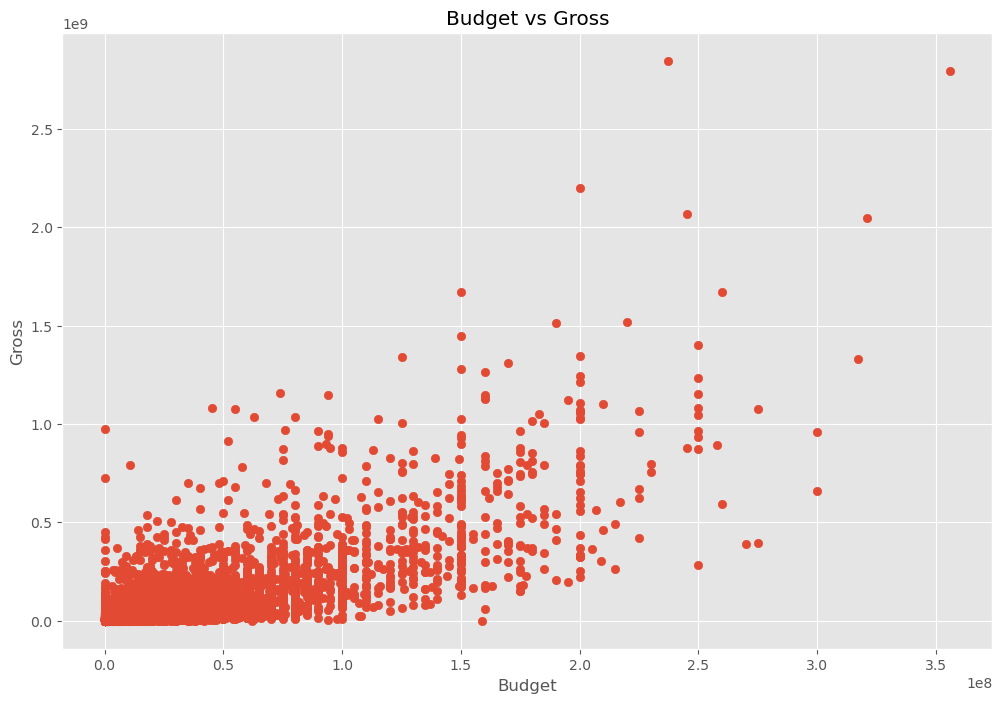

In [172]:
#Scatter plot budget vs gross

plt.scatter(x = movies['budget'], y = movies['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

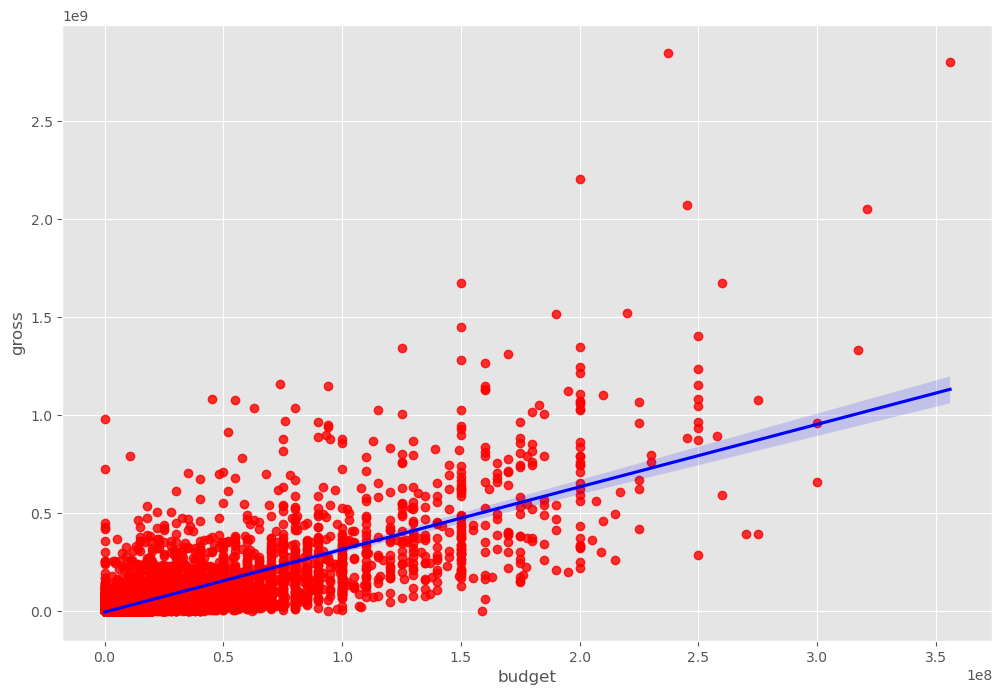

In [173]:
# plot budget vs gross avec seaborn
sns.regplot(x= 'budget', y = 'gross', data = movies, scatter_kws = {"color" : "red"}, line_kws={"color" : "blue"})

In [174]:
numeric_columns = movies.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr(method='pearson')

In [175]:
correlation_matrix

,score,votes,budget,gross,runtime,year
score,1.000000,0.407101,0.056863,0.186012,0.394564,0.001132
votes,0.407101,1.000000,0.486931,0.632870,0.306984,0.056025
budget,0.056863,0.486931,1.000000,0.750157,0.268372,0.073969
gross,0.186012,0.632870,0.750157,1.000000,0.244339,0.056556
runtime,0.394564,0.306984,0.268372,0.244339,1.000000,0.043666
year,0.001132,0.056025,0.073969,0.056556,0.043666,1.000000


In [ ]:
#Forte correlation entre budget et gross

Text(120.72222222222221, 0.5, 'Movie Features')

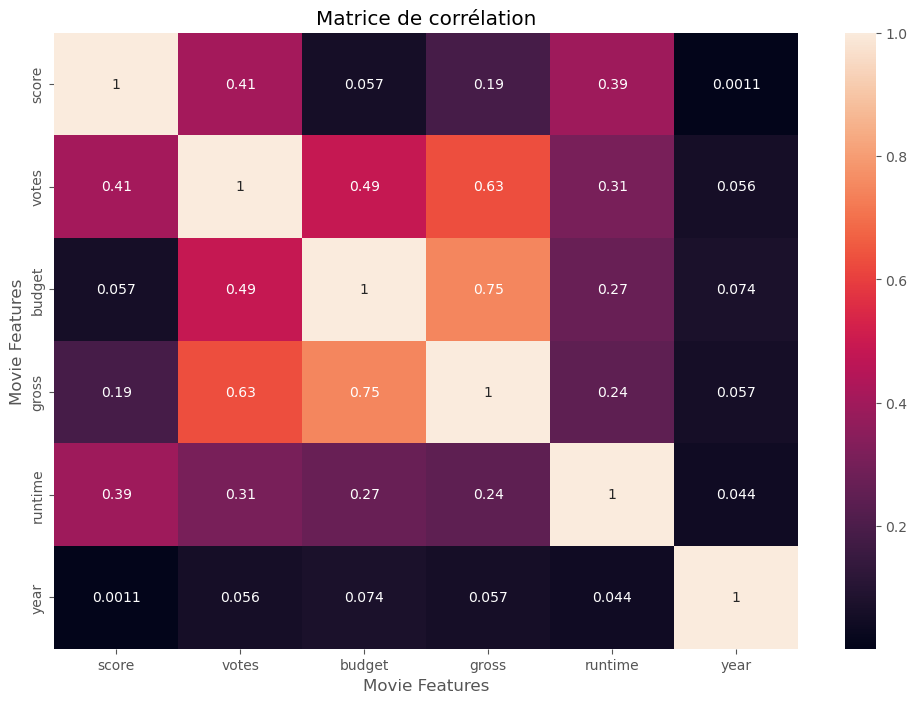

In [180]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matrice de corrélation')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [181]:
#Encodage des catégories non-numériques
movies_numerized = movies

for col_name in movies_numerized.columns : 
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes

In [194]:
movies_numerized.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released,country,year
5445,533,6,0,7.8,1100000,1155,1779,2335,237000000,2847246203,2254,162.0,2009-12-18,56,2009
7445,535,6,0,8.4,903000,162,744,2242,356000000,2797501328,1607,181.0,2019-04-26,56,2019
3045,6896,6,6,7.8,1100000,1155,1779,1596,200000000,2201647264,2254,194.0,1997-12-19,56,1997
6663,5144,6,0,7.8,876000,1125,2551,525,245000000,2069521700,1541,138.0,2015-12-18,56,2015
7244,536,6,0,8.4,897000,162,744,2242,321000000,2048359754,1607,149.0,2018-04-27,56,2018


Text(120.72222222222221, 0.5, 'Movie Features')

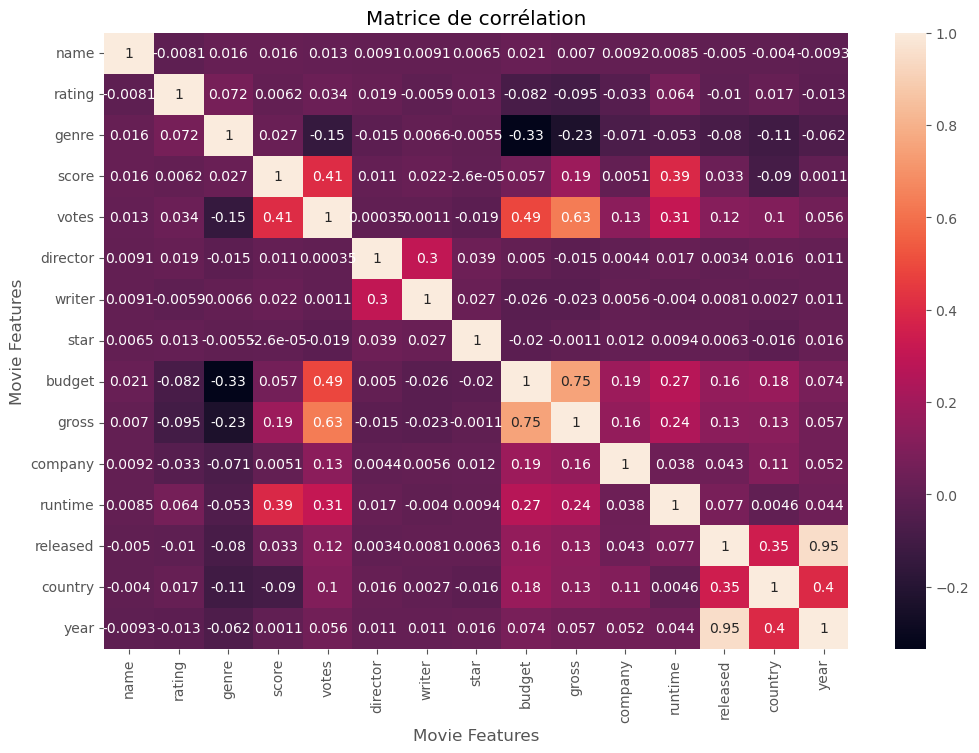

In [184]:
correlation_matrix = movies_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matrice de corrélation')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [185]:
correlation_mat = movies_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          score       0.016377
          votes       0.013038
          director    0.009079
          writer      0.009081
          star        0.006472
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.008483
          released   -0.004951
          country    -0.004039
          year       -0.009264
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          score       0.006192
          votes       0.033743
          director    0.019483
          writer     -0.005921
          star        0.013405
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.064133
          released   -0.010258
          country     0.016953
          year       -0.013129
genre     name        0.016355
          rating      0.072423
        

In [187]:
#Inspection forte proba
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

name      name        1.000000
rating    rating      1.000000
country   country     1.000000
released  released    1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
genre     genre       1.000000
star      star        1.000000
year      year        1.000000
          released    0.952036
released  year        0.952036
budget    gross       0.750157
gross     budget      0.750157
          votes       0.632870
votes     gross       0.632870
budget    votes       0.486931
votes     budget      0.486931
score     votes       0.407101
votes     score       0.407101
year      country     0.399933
country   year        0.399933
runtime   score       0.394564
score     runtime     0.394564
country   released    0.347423
released  country     0.347423
runtime   votes       0.306984
votes   

In [189]:
#forte proba
forte_proba = sorted_pairs[(sorted_pairs) > 0.5]
forte_proba

name      name        1.000000
rating    rating      1.000000
country   country     1.000000
released  released    1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
genre     genre       1.000000
star      star        1.000000
year      year        1.000000
          released    0.952036
released  year        0.952036
budget    gross       0.750157
gross     budget      0.750157
          votes       0.632870
votes     gross       0.632870
dtype: float64

In [ ]:
#Budget et Votes ont le plus fort impact sur le revenu (gross)